# Differential expression analysis using DESeq2

### import libraries

In [1]:
#import libraries
library(tidyverse)
library(DESeq2)
library(EnhancedVolcano)
library(gridExtra)
library(broman)
library(reshape2)
library(pheatmap)

── Attaching core tidyverse packages ─────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The follow

In [2]:
setwd("/home/nhk/Desktop/")

In [35]:
raw_counts <-  read.csv("DGE.csv",header=T,sep=",", row.names=1)

raw_counts

,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000092329,1837.500,2251.375,2253.250,2198.750,3981.250,4119.500,4713.875,4873.500
ENSMUSG00000007777,1353.750,1295.000,1296.750,1187.750,893.500,747.500,803.125,749.625
ENSMUSG00000020831,5378.250,4604.875,4685.750,5019.625,3415.250,2747.500,2625.000,2010.875
ENSMUSG00000107002,8675.875,7633.875,8223.625,9129.500,5496.625,4123.125,3979.875,3289.000
ENSMUSG00000058706,454.000,358.000,353.000,380.875,339.625,273.625,242.500,268.000
ENSMUSG00000060512,627.125,458.500,523.000,556.125,488.125,352.375,329.750,276.250
ENSMUSG00000090066,34.750,70.000,53.750,81.875,55.500,70.000,63.875,96.000
ENSMUSG00000030663,6014.250,7223.125,6558.875,5878.625,6476.875,5573.875,5878.625,6359.750
ENSMUSG00000028441,837.250,667.375,716.500,920.375,494.875,237.250,243.625,183.750


In [36]:
targets = read.csv("exp_design.csv",header=T,sep=",")


targets

name,Model,Biological,Fraction
<chr>,<chr>,<int>,<chr>
Illu_6m_1,young,1,Bulk
Illu_6m_2,young,2,Bulk
Illu_6m_3,young,3,Bulk
Illu_6m_4,young,4,Bulk
Illu_24m_1,aged,1,Bulk
Illu_24m_2,aged,2,Bulk
Illu_24m_3,aged,3,Bulk
Illu_24m_4,aged,4,Bulk


In [37]:
raw_counts_rm = raw_counts
raw_counts_rm

,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000092329,1837.500,2251.375,2253.250,2198.750,3981.250,4119.500,4713.875,4873.500
ENSMUSG00000007777,1353.750,1295.000,1296.750,1187.750,893.500,747.500,803.125,749.625
ENSMUSG00000020831,5378.250,4604.875,4685.750,5019.625,3415.250,2747.500,2625.000,2010.875
ENSMUSG00000107002,8675.875,7633.875,8223.625,9129.500,5496.625,4123.125,3979.875,3289.000
ENSMUSG00000058706,454.000,358.000,353.000,380.875,339.625,273.625,242.500,268.000
ENSMUSG00000060512,627.125,458.500,523.000,556.125,488.125,352.375,329.750,276.250
ENSMUSG00000090066,34.750,70.000,53.750,81.875,55.500,70.000,63.875,96.000
ENSMUSG00000030663,6014.250,7223.125,6558.875,5878.625,6476.875,5573.875,5878.625,6359.750
ENSMUSG00000028441,837.250,667.375,716.500,920.375,494.875,237.250,243.625,183.750


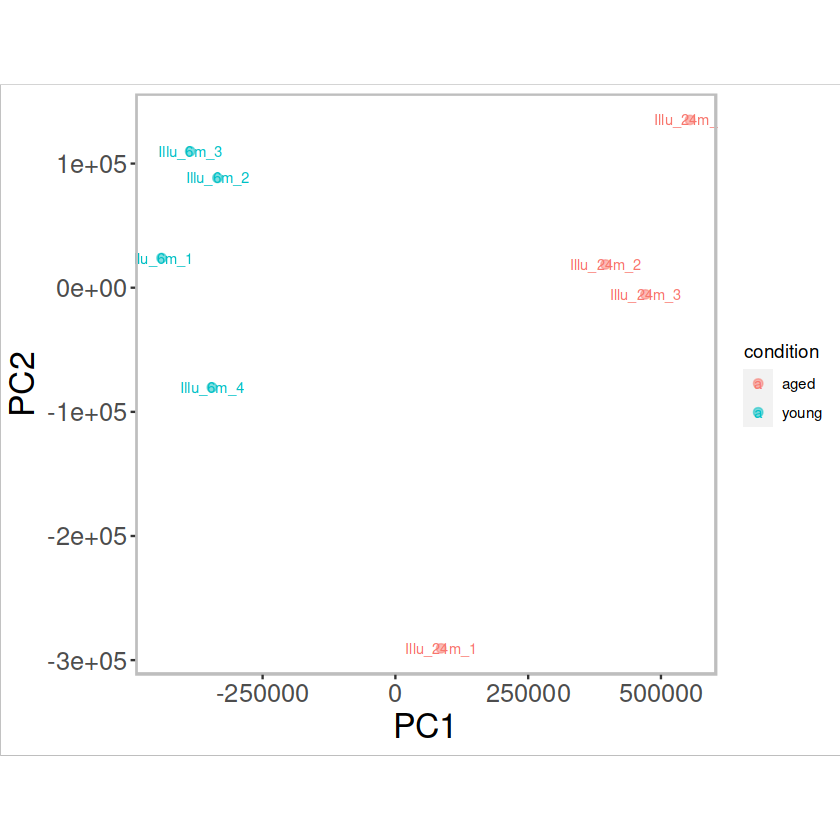

In [38]:

pca_da=prcomp(t(raw_counts_rm))

pca_data_per=round(100*pca_da$sdev^2/sum(pca_da$sdev^2),1)

ExpDesign = transform(targets, label = as.character(name), 
               condition = as.character(Model))

df_pc=data.frame(PC1 = pca_da$x[,1], PC2 = pca_da$x[,2], sample = colnames(raw_counts_rm), condition=ExpDesign$condition)

ggplot(df_pc, aes(PC1,PC2, color = condition, label=colnames(raw_counts_rm)))+
  geom_point(size=2,alpha=0.5)+ 
  geom_text(size=3)+theme(panel.grid.major = element_blank(), 
                           panel.grid.minor = element_blank(),
                           panel.background = element_blank(),
                           panel.border = element_rect(colour = "grey", fill=NA, size=1))+
  theme(axis.title = element_text(size=20)) + theme(axis.text = element_text(size=15))+
  
  theme(aspect.ratio=1/1)+
  theme(plot.background = element_rect(color = "grey", size = 0.2)) 
#geom_polygon(aes(fill=condition),alpha=0.2)+

In [363]:
ggsave(file="PCA_WO_norm.pdf", width=10, height=15, dpi=300)

In [39]:
ExpDesign = transform(targets, label = as.character(name), 
               condition = as.character(Model))


ExpDesign


name,Model,Biological,Fraction,label,condition
<chr>,<chr>,<int>,<chr>,<chr>,<chr>
Illu_6m_1,young,1,Bulk,Illu_6m_1,young
Illu_6m_2,young,2,Bulk,Illu_6m_2,young
Illu_6m_3,young,3,Bulk,Illu_6m_3,young
Illu_6m_4,young,4,Bulk,Illu_6m_4,young
Illu_24m_1,aged,1,Bulk,Illu_24m_1,aged
Illu_24m_2,aged,2,Bulk,Illu_24m_2,aged
Illu_24m_3,aged,3,Bulk,Illu_24m_3,aged
Illu_24m_4,aged,4,Bulk,Illu_24m_4,aged


In [40]:
raw_counts <- data.frame(apply(raw_counts_rm, 2, function(x) as.integer(as.character(x))))
                        
rownames(raw_counts) = rownames(raw_counts_rm) 
sapply(raw_counts, class)

Illu_6m_1  Illu_6m_2  Illu_6m_3  Illu_6m_4 Illu_24m_1 Illu_24m_2 Illu_24m_3 
 "integer"  "integer"  "integer"  "integer"  "integer"  "integer"  "integer" 
Illu_24m_4 
 "integer"

## DE analysis

In [41]:
dds <- DESeqDataSetFromMatrix(countData = raw_counts, colData = ExpDesign, 
                              design = ~condition)
dds <- DESeq(dds)

#The first in the contrast should be the sample and second to be the Control
res <- results(dds, contrast=c("condition","aged","young"))

res

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition aged vs young 
Wald test p-value: condition aged vs young 
DataFrame with 16066 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000092329  3309.057       1.144115 0.1209997   9.45552 3.21423e-21
ENSMUSG00000007777  1029.564      -0.595162 0.0877129  -6.78534 1.15810e-11
ENSMUSG00000020831  3759.641      -0.779750 0.1488636  -5.23802 1.62311e-07
ENSMUSG00000107002  6225.423      -0.908303 0.1471986  -6.17059 6.80344e-10
ENSMUSG00000058706   330.498      -0.372228 0.1416977  -2.62692 8.61617e-03
...                      ...            ...       ...       ...         ...
ENSMUSG00000113373   987.823     -0.5669325 0.1317527 -4.303005 1.68497e-05
ENSMUSG00000118528   376.584      0.5345920 0.0961365  5.560760 2.68602e-08
ENSMUSG00000118646  1517.090      0.9453583 0.0724825 13.042572 7.00535e-39
ENSMUSG00000107877   926.144   

In [71]:
write.csv(res,"DGE_res_total_aged_vs_young.csv")

## MA plot

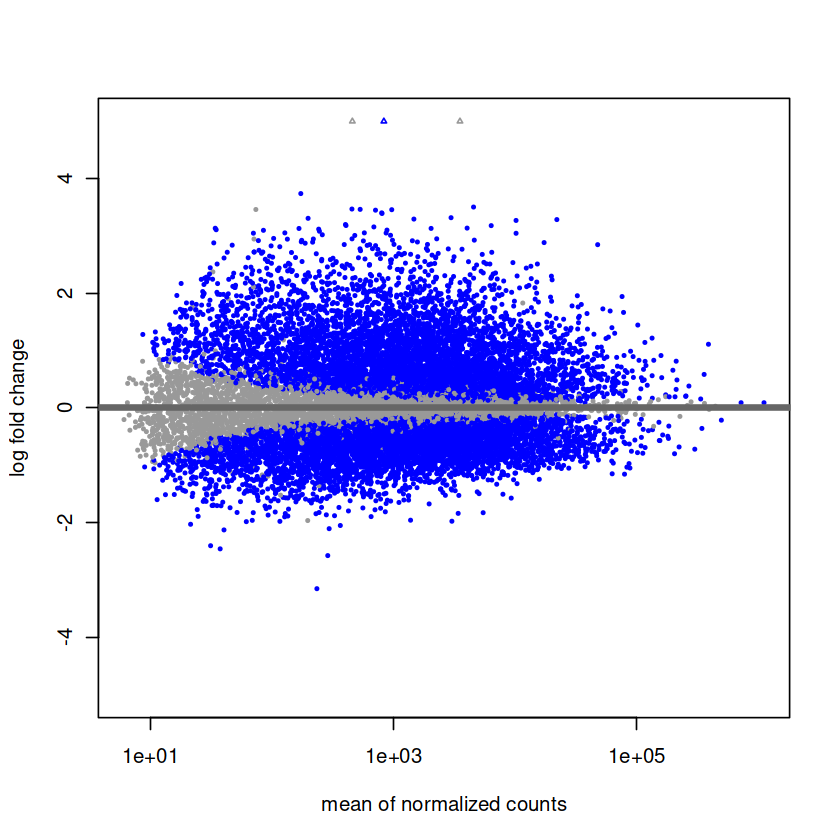

In [42]:
plotMA(res, ylim=c(-5,5))

## Normalised values from deseq2

In [43]:
normalized_counts = counts(dds, normalized=TRUE)


normalized_counts

,Illu_6m_1,Illu_6m_2,Illu_6m_3,Illu_6m_4,Illu_24m_1,Illu_24m_2,Illu_24m_3,Illu_24m_4
ENSMUSG00000092329,1775.061451,2186.76046,2186.98036,2097.65262,3963.73887,4259.960808,4867.726937,5134.574607
ENSMUSG00000007777,1307.380590,1258.04300,1258.02332,1132.80876,889.12806,772.563905,829.362345,789.205085
ENSMUSG00000020831,5196.668745,4472.61002,4547.71548,4789.86284,3400.19298,2841.008094,2711.178275,2117.893486
ENSMUSG00000107002,8382.503042,7415.16774,7982.04149,8712.22511,5472.17002,4264.097696,4109.629850,3465.548098
ENSMUSG00000058706,438.692378,347.78332,342.65604,362.65150,337.53014,282.342632,249.944816,282.385798
ENSMUSG00000060512,605.859298,444.92949,507.67453,530.61641,485.88409,364.046177,339.801010,290.815225
ENSMUSG00000090066,32.853614,68.00232,51.44694,77.30203,54.76153,72.395547,65.068279,101.153122
ENSMUSG00000030663,5811.224587,7016.86842,6365.83098,5609.64610,6447.92086,5763.719734,6070.973676,6700.340637
ENSMUSG00000028441,808.778680,647.96501,695.01906,877.99837,491.85808,245.110636,250.977646,192.823138
ENSMUSG00000037971,3967.557059,3840.18840,3715.82814,3943.35789,2946.17014,2192.550841,2113.169810,1823.917226


## Write the normalised counts to .csv file

In [143]:
csvFileName_norm <- paste("DGE_MRN_Norm",".csv")

write.csv(normalized_counts,csvFileName_norm,row.names = T,quote=F)

## Write DE results file to .csv file

In [80]:
csvFileName_DE <- paste("DGE_DE_results",".csv")

write.csv(res,csvFileName_DE,row.names = T,quote=F)

In [44]:
resNas <- subset(res, !is.na(padj) & padj!=0 & baseMean > 10) # filter 0 padj values & baseMean < 10

resOrd <- resNas[order(resNas$padj,decreasing = F),]

resSig <- subset(resOrd, padj < 0.05 & abs(log2FoldChange) >= 0.58) 

In [45]:
resSig

log2 fold change (MLE): condition aged vs young 
Wald test p-value: condition aged vs young 
DataFrame with 7049 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat       pvalue
                   <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSMUSG00000051343   8049.35        1.40658 0.0607733   23.1448 1.64132e-118
ENSMUSG00000034926   6182.73        1.59491 0.0713139   22.3647 8.68650e-111
ENSMUSG00000032594   9796.44        1.33106 0.0617018   21.5724 3.26309e-103
ENSMUSG00000038855   2873.31        1.60257 0.0764385   20.9654  1.35737e-97
ENSMUSG00000027646   6584.10        1.09347 0.0526148   20.7825  6.23164e-96
...                      ...            ...       ...       ...          ...
ENSMUSG00000026114   15.5599       1.045462  0.491109   2.12878    0.0332727
ENSMUSG00000031163   24.1868      -0.787399  0.370432  -2.12562    0.0335347
ENSMUSG00000055010   39.2487      -0.582855  0.274341  -2.12456    0.0336233
ENSMUSG00000055415   

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


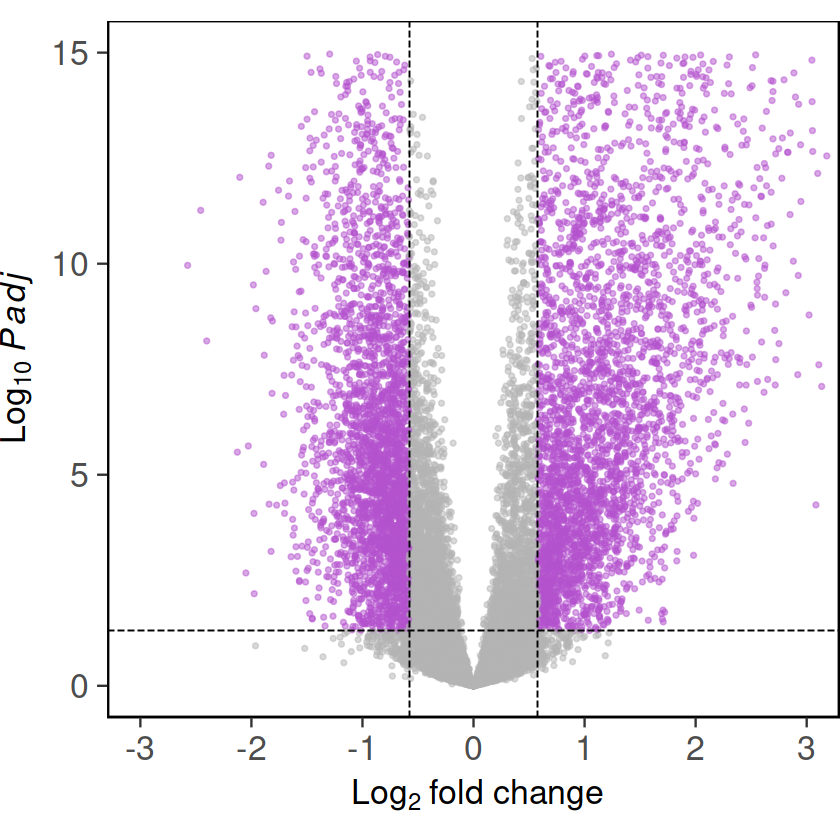

In [47]:
p1 = EnhancedVolcano(res,lab = rownames(res),
                        x = "log2FoldChange",
                        y = "padj",
                ylab = bquote(~-Log[10]~italic(Padj)),
                        pCutoff = 0.05,
                        FCcutoff = 0.58,title = ' ',subtitle = ' ', caption = ' ',
                        gridlines.major = FALSE,gridlines.minor = FALSE,
                         border = "full",selectLab = NA,
                         borderWidth = 0.8,
                         borderColour = "black",
                         pointSize = 1,col = c("grey70", "grey70", "grey70", "mediumorchid3"),
                         labSize = 4.0,axisLabSize = 20,
                         legendLabels=c('Not sig.','Log (base 2) FC','p-value',
                                        'p-value & Log (base 2) FC'),
                         legendPosition = 'right', ylim = c(0,15),
                         legendLabSize = 14,
                         legendIconSize = 5.0)

p1+ ggplot2::coord_cartesian(xlim=c(-3, 3)) +
ggplot2::scale_x_continuous(breaks=seq(-3,3, 1))+
theme(plot.title = element_blank(),
        legend.position = "none",
        axis.ticks = element_line(size=0.5))+
  theme(plot.margin = unit(c(-0.5,0,-0.5,0), "cm")) 




In [86]:
ggsave(file="Volcano_DGE.pdf", width=5, height=5, dpi=300)